In [1]:
import numpy as np
import math as mt
import sympy as sym
import matplotlib.pyplot as plt
from numpy import *
from numpy import genfromtxt
from matplotlib import pyplot as plt
from fractions import Fraction as F
from scipy.optimize import leastsq
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import sympy as sym
import csv
from sympy import *
import math
from scipy.integrate import quad

In [2]:
print("RATDAS01-Crystal_class = 2")
print("Signal - 1064 nm")
"""We have to diagonalize the dielectric matrix obtained from crystal 17 output file to calculate the trace of 
the matrix which corresponds to refractive index in the crystallographic frame. The obtained trace can be 
compared with the output which crystal 17 output file gives
"""
#M = Matrix([[3.6247,  -0.2578, 0.4627], [-0.2578 , 2.5034, 0.0606], [0.4627, 0.0606, 3.6322 ]])
M = Matrix([[2.5853, 0.0, 0.0429], [0.0, 2.3892, 0.0], [0.0429, 0.0, 2.4238]])
# Use sympy.diagonalize() method 
P, D = M.diagonalize()
#print("Diagonal of a matrix : {}".format(D)) 
print(D[0],D[4],D[8])
print("na=",round(math.sqrt(D[0]),8))
print("nb=",round(math.sqrt(D[4]),8))
print("nc=",round(math.sqrt(D[8]),8))

#M = Matrix([[4.0845,  -0.3490, 0.6566], [-0.3490 , 2.6349, 0.0632], [0.6566, 0.0632, 4.0274 ]])
# Use sympy.diagonalize() method 
#P, D = M.diagonalize()
#print("Diagonal of a matrix : {}".format(D)) 
#print(D[0],D[4],D[8])
#print("nx=",round(math.sqrt(D[0]),8))
#print("ny=",round(math.sqrt(D[4]),8))
#print("nz=",round(math.sqrt(D[8]),8))

RATDAS01-Crystal_class = 2
Signal - 1064 nm
2.38920000000000 2.59598835355036 2.41311164644964
na= 1.54570372
nb= 1.61120711
nc= 1.55341934


In [3]:
""""
Transformation - (X, Y, Z -> a, c, b) to satisfy biaxial condition nZ > nY > nX. We can then estimate the phase 
matching condition for biaxial crystals. With the known transformation (X, Y, Z -> a, b, c), we transform the
second order tensor elements (Chi 2) arrange in the same way Crystal output tensor order Crystal 17 gives total 
of 27 tensor elements.
"""

'"\nTransformation - (X, Y, Z -> a, c, b) to satisfy biaxial condition nZ > nY > nX. We can then estimate the phase \nmatching condition for biaxial crystals. With the known transformation (X, Y, Z -> a, b, c), we transform the\nsecond order tensor elements (Chi 2) arrange in the same way Crystal output tensor order Crystal 17 gives total \nof 27 tensor elements.\n'

In [4]:
 """
 Before transformation
     XXX         -0.5644E-04  -0.4161E-07  -0.4046E-07  -0.9653E-09
     XXY          0.1299E+03   0.9575E-01   0.9310E-01   0.2221E-02
     XXZ         -0.8642E-04  -0.6371E-07  -0.6195E-07  -0.1478E-08
     XYX          0.1299E+03   0.9575E-01   0.9310E-01   0.2221E-02
     XYY         -0.3104E-03  -0.2289E-06  -0.2225E-06  -0.5309E-08
     XYZ         -0.3617E+03  -0.2667E+00  -0.2593E+00  -0.6186E-02
     XZX         -0.8642E-04  -0.6371E-07  -0.6195E-07  -0.1478E-08
     XZY         -0.3617E+03  -0.2667E+00  -0.2593E+00  -0.6186E-02
     XZZ         -0.2382E-04  -0.1756E-07  -0.1708E-07  -0.4074E-09
     YXX          0.1207E+03   0.8896E-01   0.8650E-01   0.2064E-02
     YXY         -0.3247E-03  -0.2394E-06  -0.2328E-06  -0.5553E-08
     YXZ         -0.3487E+03  -0.2571E+00  -0.2500E+00  -0.5964E-02
     YYX         -0.3247E-03  -0.2394E-06  -0.2328E-06  -0.5553E-08
     YYY          0.1322E+04   0.9745E+00   0.9476E+00   0.2261E-01
     YYZ         -0.3873E-03  -0.2855E-06  -0.2776E-06  -0.6623E-08
     YZX         -0.3487E+03  -0.2571E+00  -0.2500E+00  -0.5964E-02
     YZY         -0.3873E-03  -0.2855E-06  -0.2776E-06  -0.6623E-08
     YZZ         -0.1228E+04  -0.9055E+00  -0.8805E+00  -0.2100E-01
     ZXX         -0.9691E-04  -0.7145E-07  -0.6947E-07  -0.1657E-08
     ZXY         -0.3569E+03  -0.2631E+00  -0.2559E+00  -0.6104E-02
     ZXZ         -0.1529E-04  -0.1127E-07  -0.1096E-07  -0.2614E-09
     ZYX         -0.3569E+03  -0.2631E+00  -0.2559E+00  -0.6104E-02
     ZYY         -0.2999E-03  -0.2211E-06  -0.2150E-06  -0.5128E-08
     ZYZ         -0.1239E+04  -0.9138E+00  -0.8885E+00  -0.2120E-01
     ZZX         -0.1529E-04  -0.1127E-07  -0.1096E-07  -0.2614E-09
     ZZY         -0.1239E+04  -0.9138E+00  -0.8885E+00  -0.2120E-01
     ZZZ         -0.3155E-03  -0.2326E-06  -0.2262E-06  -0.5395E-08
After Transformation
 XXX                   -5.64399998E-05  -4.16100008E-08  -4.04600016E-08  -9.65299951E-10
 XXY                   -8.64199974E-05  -6.37099973E-08  -6.19499971E-08  -1.47799994E-09
 XXZ                    129.899994       9.57499966E-02   9.30999964E-02   2.22099992E-03
 XYX                   -8.64199974E-05  -6.37099973E-08  -6.19499971E-08  -1.47799994E-09
 XYY                   -2.38199991E-05  -1.75599997E-08  -1.70799996E-08  -4.07400003E-10
 XYZ                   -361.700012     -0.266700000     -0.259299994      -6.18600007E-03
 XZX                    129.899994       9.57499966E-02   9.30999964E-02   2.22099992E-03
 XZY                   -361.700012     -0.266700000     -0.259299994      -6.18600007E-03
 XZZ                   -3.10400006E-04  -2.28900007E-07  -2.22500006E-07  -5.30899991E-09
 YXX                   -9.69100001E-05  -7.14500032E-08  -6.94699978E-08  -1.65699998E-09
 YXY                   -1.52899993E-05  -1.12700000E-08  -1.09600000E-08  -2.61400013E-10
 YXZ                   -356.899994     -0.263099998     -0.255899996      -6.10399991E-03
 YYX                   -1.52899993E-05  -1.12700000E-08  -1.09600000E-08  -2.61400013E-10
 YYY                   -3.15499987E-04  -2.32600001E-07  -2.26200001E-07  -5.39500000E-09
 YYZ                   -1239.00000     -0.913800001     -0.888499975      -2.11999994E-02
 YZX                   -356.899994     -0.263099998     -0.255899996      -6.10399991E-03
 YZY                   -1239.00000     -0.913800001     -0.888499975      -2.11999994E-02
 YZZ                   -2.99900013E-04  -2.21099995E-07  -2.15000000E-07  -5.12799980E-09
 ZXX                    120.699997       8.89599994E-02   8.64999965E-02   2.06399988E-03
 ZXY                   -348.700012     -0.257099986     -0.250000000      -5.96399978E-03
 ZXZ                   -3.24699999E-04  -2.39400009E-07  -2.32800005E-07  -5.55299984E-09
 ZYX                   -348.700012     -0.257099986     -0.250000000      -5.96399978E-03
 ZYY                   -1228.00000     -0.905499995     -0.880500019      -2.09999997E-02
 ZYZ                   -3.87300010E-04  -2.85499993E-07  -2.77600009E-07  -6.62299993E-09
 ZZX                   -3.24699999E-04  -2.39400009E-07  -2.32800005E-07  -5.55299984E-09
 ZZY                   -3.87300010E-04  -2.85499993E-07  -2.77600009E-07  -6.62299993E-09
 ZZZ                    1322.00000      0.974500000      0.947600007       2.26099994E-02
 """

'\nBefore transformation\n    XXX         -0.5644E-04  -0.4161E-07  -0.4046E-07  -0.9653E-09\n    XXY          0.1299E+03   0.9575E-01   0.9310E-01   0.2221E-02\n    XXZ         -0.8642E-04  -0.6371E-07  -0.6195E-07  -0.1478E-08\n    XYX          0.1299E+03   0.9575E-01   0.9310E-01   0.2221E-02\n    XYY         -0.3104E-03  -0.2289E-06  -0.2225E-06  -0.5309E-08\n    XYZ         -0.3617E+03  -0.2667E+00  -0.2593E+00  -0.6186E-02\n    XZX         -0.8642E-04  -0.6371E-07  -0.6195E-07  -0.1478E-08\n    XZY         -0.3617E+03  -0.2667E+00  -0.2593E+00  -0.6186E-02\n    XZZ         -0.2382E-04  -0.1756E-07  -0.1708E-07  -0.4074E-09\n    YXX          0.1207E+03   0.8896E-01   0.8650E-01   0.2064E-02\n    YXY         -0.3247E-03  -0.2394E-06  -0.2328E-06  -0.5553E-08\n    YXZ         -0.3487E+03  -0.2571E+00  -0.2500E+00  -0.5964E-02\n    YYX         -0.3247E-03  -0.2394E-06  -0.2328E-06  -0.5553E-08\n    YYY          0.1322E+04   0.9745E+00   0.9476E+00   0.2261E-01\n    YYZ         -0.387

In [2]:
import numpy as np
import math as mt
import sympy as sym
import matplotlib.pyplot as plt
from numpy import *
from numpy import genfromtxt
from matplotlib import pyplot as plt
from fractions import Fraction as F
from scipy.optimize import leastsq
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import sympy as sym
import csv
from scipy.integrate import quad
########################################################
############################################################################################
my_data1 = genfromtxt('RATDAS01.csv', delimiter='')
f=my_data1[:,3] # Third column of this file is de deff in PV/m

def Deff_NU(f,g1,phi1):
    import sympy as sym
    X=np.zeros((3,3))
    m=np.split(f,3)
    X1=m[0]
    n=np.split(X1,3)
    X2=n[0]
    X3=n[1]
    X4=n[2]
    for i in range(0,3):
        X[0,i]=X2[i]
        X[1,i]=X3[i]
        X[2,i]=X4[i]

    Y=np.zeros((3,3))
    m=np.split(f,3)
    X1=m[1]
    n=np.split(X1,3)
    X2=n[0]
    X3=n[1]
    X4=n[2]
    for i in range(0,3):
        Y[0,i]=X2[i]
        Y[1,i]=X3[i]
        Y[2,i]=X4[i]

    Z=np.zeros((3,3))
    m=np.split(f,3)
    X1=m[2]
    n=np.split(X1,3)
    X2=n[0]
    X3=n[1]
    X4=n[2]
    for i in range(0,3):
        Z[0,i]=X2[i]
        Z[1,i]=X3[i]
        Z[2,i]=X4[i]

    T=[X,Y,Z]
    T1=array(T)

    θ, ϕ = sym.symbols('θ ϕ')
    a=[ sym.sin(ϕ),-sym.cos(ϕ) , 0 ]
    b=[ -sym.cos(θ)*sym.cos(ϕ) ,-sym.cos(θ)*sym.sin(ϕ) , sym.sin(θ) ]

    result=0
    for i in range(3):
        for j in range(3):
            for k in range(3):
                #print(i,j,k)
                #print(T1[i,j,k]*Ew[j]*E2w[k]*Ew[i])
                result += a[i]*T1[i,j,k]*b[j]*b[k]
#negative
#                result += b[i]*T1[i,j,k]*a[j]*a[k]

    θ, ϕ = sym.symbols('θ ϕ')

    result1=result.subs(θ,radians(g1))

    D=[]
    I=[]
    val = (abs(result1.subs((ϕ),radians(phi1))))
    val1 = ((result1.subs((ϕ),radians(phi1))))
    return val,val1

##################################
##################################
def Deff_NU1(f,g1,phi1):
    import sympy as sym
    X=np.zeros((3,3))
    m=np.split(f,3)
    X1=m[0]
    n=np.split(X1,3)
    X2=n[0]
    X3=n[1]
    X4=n[2]
    for i in range(0,3):
        X[0,i]=X2[i]
        X[1,i]=X3[i]
        X[2,i]=X4[i]

    Y=np.zeros((3,3))
    m=np.split(f,3)
    X1=m[1]
    n=np.split(X1,3)
    X2=n[0]
    X3=n[1]
    X4=n[2]
    for i in range(0,3):
        Y[0,i]=X2[i]
        Y[1,i]=X3[i]
        Y[2,i]=X4[i]

    Z=np.zeros((3,3))
    m=np.split(f,3)
    X1=m[2]
    n=np.split(X1,3)
    X2=n[0]
    X3=n[1]
    X4=n[2]
    for i in range(0,3):
        Z[0,i]=X2[i]
        Z[1,i]=X3[i]
        Z[2,i]=X4[i]

    T=[X,Y,Z]
    T1=array(T)

    θ, ϕ = sym.symbols('θ ϕ')
    a=[ sym.sin(ϕ),-sym.cos(ϕ) , 0 ]
    b=[ -sym.cos(θ)*sym.cos(ϕ) ,-sym.cos(θ)*sym.sin(ϕ) , sym.sin(θ) ]

    result=0
    for i in range(3):
        for j in range(3):
            for k in range(3):
                #print(i,j,k)
                #print(T1[i,j,k]*Ew[j]*E2w[k]*Ew[i])
#                result += a[i]*T1[i,j,k]*b[j]*b[k]
#negative
                result += b[i]*T1[i,j,k]*a[j]*a[k]

    θ, ϕ = sym.symbols('θ ϕ')

    result1=result.subs(θ,radians(g1))
    D=[]
    I=[]
    val = (abs(result1.subs((ϕ),radians(phi1))))
    val1 = ((result1.subs((ϕ),radians(phi1))))
    return val,val1
##################################

x1=sym.symbols('x1')
c=sym.symbols('c')
my_data =  genfromtxt('RATDAS01.txt1', delimiter='')
#def funcSell(x, A, B, C, D):
#    return ((A)+ B/(x**2-C) - D*x**2)

#def Sell(x1, A, B, C, D):
#    return math.sqrt((A)+ B/(x1**2-C) - D*x1**2)


def funcSell(x, A, B1, C1, B2, C2):
    return ((A)+(((x**2)*B1)/((x**2)-C1))+(((x**2)*B2)/((x**2)-C2)))

def Sell(x1, A, B1, C1, B2, C2):
    return math.sqrt(((A)+(((x1**2)*B1)/((x1**2)-C1))+(((x1**2)*B2)/((x1**2)-C2))))



def dielectric():
    bg=4.3819
    x=1239.84193/bg
    y=1100
    z=2000
    f=my_data[:,0]
    xx=my_data[:,1]
    yy=my_data[:,2]
    zz=my_data[:,3]

    f1=[]
    zz2=[]
    xx2=[]
    yy2=[]

    if len(zz)==len(xx):
        for i in range(0,len(f)):
            if bg>=f[i]>=1.12713: # This limit was due to the CASTEP file, but in Crystal one can have
                f1.append((round(1239.84193/f[i],2)))# Tranform frecuency in eV to nm wavelength
                a=round((xx[i])**2,6)
                b=round((yy[i])**2,6)
                c=round((zz[i])**2,6)
                zz2.append(c)
                xx2.append(a)
                yy2.append(b)

    X = np.linspace(x, y, z)

    constantsSell, _ = sc.optimize.curve_fit(funcSell, f1, xx2, maxfev=9999990, xtol=1e-8)
    Y3=funcSell(X,*constantsSell)
    constantsSell1, _ = sc.optimize.curve_fit(funcSell, f1, zz2, maxfev=9999990, xtol=1e-8)
    Y4=funcSell(X,*constantsSell1)
    constantsSell2, _ = sc.optimize.curve_fit(funcSell, f1, yy2, maxfev=9999990, xtol=1e-8)
    Y4=funcSell(X,*constantsSell2)

    nx = [constantsSell[0],constantsSell[1],constantsSell[2],constantsSell[3],constantsSell[4]]
    ny = [constantsSell2[0],constantsSell2[1],constantsSell2[2],constantsSell2[3],constantsSell2[4]]
    nz = [constantsSell1[0],constantsSell1[1],constantsSell1[2],constantsSell1[3],constantsSell1[4]]
    return nx,ny,nz
############################################################################################
##############################################################################################
nx, ny, nz =dielectric()
omega=1064
omega2=1064/2
#print("omega",omega,"2omega",omega2)
#print((Sell(omega,*nx))**1,(Sell(omega,*ny))**1,(Sell(omega,*nz))**1,(Sell(omega2,*nx))**1,(Sell(omega2,*ny))**1,(Sell(omega2,*nz))**1)
nx2 = round(Sell(omega,*nx),6)
ny2 = round(Sell(omega,*ny),6)
nz2 = round(Sell(omega,*nz),6)
nx3 = round(Sell(omega2,*nx),6)
ny3 = round(Sell(omega2,*ny),6)
nz3 = round(Sell(omega2,*nz),6)
print("nx(w), ny(w), nz(w), nx(2w), ny(2w), nz(2w)")
print(nx2,ny2,nz2,nx3,ny3,nz3)

a1 = 1.0 / nx2**2
b1 = 1.0 / ny2**2
c1 = 1.0 / nz2**2
a2 = 1.0 / nx3**2
b2 = 1.0 / ny3**2
c2 = 1.0 / nz3**2
#print(type(a1))
if (nz2 - ny2 > ny2-nx2):
    deff = []
    deff1 = []
    thetaopt = []
    phiopt = []

    for theta1 in range(1801):
        theta2 = float(theta1) / 10.0
        theta = math.radians(theta2)
        for phi1 in range(3601):
            phi2 = float(phi1) / 10.0
            phi = math.radians(phi2)
            kx = math.sin(theta) * math.cos(phi)
            ky = math.sin(theta) * math.sin(phi)
            kz = math.cos(theta)

            b11 = -kx ** 2.0 * (b1 + c1) - ky ** 2.0 * (a1 + c1) - kz ** 2.0 * (a1 + b1)
            c11 =  kx ** 2.0 * (b1 * c1) + ky ** 2.0 * (a1 * c1) + kz ** 2.0 * (a1 * b1)

            b12 = -kx ** 2.0 * (b2 + c2) - ky ** 2.0 * (a2 + c2) - kz ** 2.0 * (a2 + b2)
            c12 =  kx ** 2.0 * (b2 * c2) + ky ** 2.0 * (a2 * c2) + kz ** 2.0 * (a2 * b2)

            lhs =  math.sqrt(2.0) / (math.sqrt(-b11 - math.sqrt(b11 ** 2.0 - 4.0 * c11)))
#        lhs2 = 1.0 / (math.sqrt(-b11 + math.sqrt(b11 ** 2.0 - 4.0 * c11)))
#        lhs = 0.5 * (lhs1 + lhs2)
            rhs =  math.sqrt(2.0) / (math.sqrt(-b12 + math.sqrt(b12 ** 2.0 - 4.0 * c12)))
            if abs(lhs- rhs) < 0.0001:
                valabs , valbas1 = Deff_NU(f,theta2, phi2)
                deff.append(valabs)
                thetaopt.append(theta2)
                phiopt.append(phi2)
                deff1.append(valbas1)
#            print(valbas,theta2,phi2)

    with open("RATDAS01-1.csv", 'w') as f:
        writer = csv.writer(f, delimiter='\t')
        writer.writerows(zip(deff1,thetaopt,phiopt))
    f.close()
    arrdeff = np.array(deff)
    arrtheta = np.array(thetaopt)
    arrphi = np.array(phiopt)
    var=np.argmax(arrdeff)
    print("Optimum phase matching:","Theta_c =",thetaopt[var],",Phi_c =",phiopt[var], ",deff (pm/V) = ",arrdeff[var])
    print("Crystal: Positive biaxial")
elif nz2 - ny2 < ny2-nx2:
    deff = []
    deff1 = []
    thetaopt = []
    phiopt = []

    for theta1 in range(1801):
        theta2 = float(theta1) / 10.0
        theta = math.radians(theta2)
        for phi1 in range(3601):
            phi2 = float(phi1) / 10.0
            phi = math.radians(phi2)
            kx = math.sin(theta) * math.cos(phi)
            ky = math.sin(theta) * math.sin(phi)
            kz = math.cos(theta)

            b11 = -kx ** 2.0 * (b1 + c1) - ky ** 2.0 * (a1 + c1) - kz ** 2.0 * (a1 + b1)
            c11 =  kx ** 2.0 * (b1 * c1) + ky ** 2.0 * (a1 * c1) + kz ** 2.0 * (a1 * b1)

            b12 = -kx ** 2.0 * (b2 + c2) - ky ** 2.0 * (a2 + c2) - kz ** 2.0 * (a2 + b2)
            c12 =  kx ** 2.0 * (b2 * c2) + ky ** 2.0 * (a2 * c2) + kz ** 2.0 * (a2 * b2)

            lhs =  math.sqrt(2.0) / (math.sqrt(-b11 - math.sqrt(b11 ** 2.0 - 4.0 * c11)))
#        lhs2 = 1.0 / (math.sqrt(-b11 + math.sqrt(b11 ** 2.0 - 4.0 * c11)))
#        lhs = 0.5 * (lhs1 + lhs2)
            rhs =  math.sqrt(2.0) / (math.sqrt(-b12 + math.sqrt(b12 ** 2.0 - 4.0 * c12)))
            if abs(lhs- rhs) < 0.0001:
                valabs , valbas1 = Deff_NU1(f,theta2, phi2)
                deff.append(valabs)
                thetaopt.append(theta2)
                phiopt.append(phi2)
                deff1.append(valbas1)
#            print(valbas,theta2,phi2)
    with open("RATDAS01-1.csv", 'w') as f:
        writer = csv.writer(f, delimiter='\t')
        writer.writerows(zip(deff1,thetaopt,phiopt))
    f.close()
    arrdeff = np.array(deff)
    arrtheta = np.array(thetaopt)
    arrphi = np.array(phiopt)
    var=np.argmax(arrdeff)
    print("Optimum phase matching:","Theta_c =",thetaopt[var],",Phi_c =",phiopt[var], ",deff (pm/V) = ",arrdeff[var])
    print("Crystal: Negative biaxial")
#######################################################

lp = omega2
l1 = lp*2
#deff = 3.7*1E-12*2
#x2_eff = 2*deff
L = 1E-3

theta_m =  thetaopt[var]
phi_m =    phiopt[var]
deff_m =   arrdeff[var]

#print(theta_m,phi_m,deff_m)
x=sym.symbols('x')
def Sell(l, A, B1, C1, B2, C2):
    return mt.sqrt(((A)+(((l**2)*B1)/((l**2)-C1))+(((l**2)*B2)/((l**2)-C2))))
def Sell2(x, A, B1, C1, B2, C2):
        return sym.sqrt(((A)+(((x**2)*B1)/((x**2)-C1))+(((x**2)*B2)/((x**2)-C2))))

sigma_p = 0.875E-6
sigma_1 = 1.875E-6
P = 1E-3
pi = mt.pi
c=299792458
l = omega2
lam_t = l
#print((Sell2(831.8601,*nx))**1)
Dx = sym.diff(Sell2(x,*nx))
Dy = sym.diff(Sell2(x,*ny))
Dz = sym.diff(Sell2(x,*nz))
ng1 = Sell(l1,*nx)-l1*Dx.subs(x,l1)
ng2 = Sell(l1,*ny)-l1*Dy.subs(x,l1)
ng3 = Sell(l1,*nz)-l1*Dz.subs(x,l1)
vg1 = c/ng1
vg2 = c/ng2
vg3 = c/ng3
nx_ = Sell2(l1,*nx)
ny_ = Sell2(l1,*ny)
nz_ = Sell2(l1,*nz)

if nz_-ny_>ny_-nx_:
    type_="positive"
elif ny_-nx_>nz_-ny_:
    type_="negative"

def f1 (x,theta,phi):
    Sell_xsi = Sell2(x, *nx)**2
    Sell_ysi = Sell2(x, *ny)**2
    Sell_zsi = Sell2(x, *nz)**2
    a1 = 1/Sell_xsi
    b1 = 1/Sell_ysi
    c1 = 1/Sell_zsi
    kx=np.sin(theta)*np.cos(phi)
    ky=np.sin(theta)*np.sin(phi)
    kz=np.cos(theta)
    b11 = -(kx**2)*(b1+c1)-(ky**2)*(a1+c1)-(kz**2)*(a1+b1)
    c11 = (kx**2)*b1*c1 + (ky**2)*a1*c1 + (kz**2)*a1*b1
    n1 = sym.sqrt(2)/(sym.sqrt(-b11-sym.sqrt((b11**2) - 4*c11)))
    return n1

def f2 (x,theta,phi):
    Sell_xsi = Sell2(x, *nx)**2
    Sell_ysi = Sell2(x, *ny)**2
    Sell_zsi = Sell2(x, *nz)**2
    a1 = 1/Sell_xsi
    b1 = 1/Sell_ysi
    c1 = 1/Sell_zsi
    kx=np.sin(theta)*np.cos(phi)
    ky=np.sin(theta)*np.sin(phi)
    kz=np.cos(theta)
    b11 = -(kx**2)*(b1+c1)-(ky**2)*(a1+c1)-(kz**2)*(a1+b1)
    c11 = (kx**2)*b1*c1 + (ky**2)*a1*c1 + (kz**2)*a1*b1
    n1 = sym.sqrt(2)/(sym.sqrt(-b11+sym.sqrt((b11**2) - 4*c11)))
    return n1

def ng1(l1,theta_m,phi_m):
    D = sym.diff(f1(x,theta_m,phi_m))
    a = f1(x,theta_m,phi_m)-l1*1*(D)
    a = a.subs(x,l1)
    return a

def ng2(l1,theta_m,phi_m):
    D = sym.diff(f2(x,theta_m,phi_m))
    a = f2(x,theta_m,phi_m)-l1*1*(D)
    a = a.subs(x,l1)
    return a

def vgd1(l1,theta_m,phi_m):
    a = ((l1*1E-9)**3)/(2*mt.pi*c*c)
    D2 = sym.diff(f1(x,theta_m,phi_m))
    D3 = sym.diff(D2)*1E18
    # print(D3.subs(x,l1))
    Dl = a*D3
    Dl = Dl.subs(x,l1)
    return Dl

def vgd2(l1,theta_m,phi_m):
    a = ((l1*1E-9)**3)/(2*mt.pi*c*c)
    D2 = sym.diff(f2(x,theta_m,phi_m))
    D3 = sym.diff(D2)*1E18
    # print(D3.subs(x,l1))
    Dl = a*D3
    Dl = Dl.subs(x,l1)
    return Dl

Vg2 = vgd2(l1,theta_m*mt.pi/180,phi_m*mt.pi/180)
##################

deff_m = deff_m*1E-12*2

""" value of the review"""
# deff_m = 3.7*1E-12

eo = 8.8541878176E-12
P = 1E-3
def sinc (D,L):
        # print(v,D,L)
        s = np.sin(D*L/2)
        s = (s*2) / (D*L)
        return s
    
def sinc2 (x,L):
        # print(v,D,L)
        s = sym.sin(x*L/2)
        s = (s*2) / (x*L)
        return s

if type_=='positive':

    n_1 = f2(l1,theta_m*mt.pi/180,phi_m*mt.pi/180)
    ng_ = ng2(l1,theta_m*mt.pi/180,phi_m*mt.pi/180)
    n_p = f1(lp,theta_m*mt.pi/180,phi_m*mt.pi/180)
    wp = 2*mt.pi*c/  (lp*1E-9*n_p)
    w1 = 2*mt.pi*c/  (l1*1E-9*n_1)
    Vg = float(vgd2(l1,theta_m*mt.pi/180,phi_m*mt.pi/180))

elif type_=='negative':
    Vg = float(vgd1(l1,theta_m*mt.pi/180,phi_m*mt.pi/180))
    n_1 = f1(l1,theta_m*mt.pi/180,phi_m*mt.pi/180)
    n_p = f2(lp,theta_m*mt.pi/180,phi_m*mt.pi/180)
    ng_ = ng1(l1,theta_m*mt.pi/180,phi_m*mt.pi/180)
    wp = 2*mt.pi*c/  (lp*1E-9*n_p)
    w1 = 2*mt.pi*c/  (l1*1E-9*n_1)

f= int(wp/2)
det = np.linspace(-f,f,100)
d_k = []

for a in range(len(det)):
    delta_k = (w1+det[a])*(wp-w1+det[a])*sinc(float(Vg*(w1+det[a] -wp/2)**2),0.001)**2
    d_k.append(delta_k)
#plt.plot(det,d_k,"-")

w1 = float(w1)
wp = float(wp)
Io = lambda h : (w1+h)*(wp-(w1+h))*np.sin((Vg*(w1+h -wp/2)**2)*0.001/2)*2/((Vg*(w1+h -wp/2)**2)*0.001)
Io1 = quad(Io, -f, f+10)
error = Io1[1]
Io1 = Io1[0]

eo = 8.8541878176E-12
P = 1E-3
Ep2 = P/(c*eo*mt.pi*n_1*sigma_p**2)
R1 = Ep2*(deff_m**2)*L*L/(2*mt.pi*c*c)
R2 = ng_*ng_/(n_1**4)
R3 = (abs(sigma_p**2/(sigma_1**2 + 2*sigma_p**2)))**2

#print(R1,R2,R3,Io1)
Rsm = float(R1*R2*R3*Io1)

#print("GVD:")
#print(Vg)
print("Photon Count:",Rsm,"s^-1 mW^-1 mm^-1")
###########G2###########################
band = 10E-9
band =  c / (band)

def I(x,t):
    s = mt.sin((Vg*L/4)*x*x)
    s = s/((Vg*L/4)*x*x)
    a = np.exp(-x**2/band**2)
    b = np.exp(1j*x*t)

    inte = s*a*b
    return inte.real


def Ii(x,t):
    s = mt.sin((Vg*L/4)*x*x)
    s = s/((Vg*L/4)*x*x)
    a = np.exp(-x**2/band**2)
    b = np.exp(1j*x*t)

    inte = s*a*b
    return inte.imag


vo= mt.sqrt(4/(Vg*L))
tl = mt.sqrt(Vg*L/4)*20
tl = tl*vo
vo = vo/(vo*2)
tau = np.linspace(-tl,tl,1000)
G2 = []

for a in range(len(tau)):
    I1 = quad(I,-vo-vo/100,vo,args = (tau[a]))[0]
    I2 = quad(Ii,-vo-vo/100,vo,args = (tau[a]))[0]
    i_t = np.sqrt(I1.real**2+I2.real**2)**2
    G2.append(i_t)

#for a in range(len(tau)):
#    print(tau[a],"   ",G2[a])
tau = tau*mt.sqrt(Vg*L/4)/2
################################
with open("RATDAS01-G2.csv", 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(zip(tau,G2))
f.close()
################################
f_max = np.max(G2)
f_2 = f_max/2
val = []
num = []
i = np.argmin(np.abs(G2-f_2))
G2_fwhm= G2[i]
i_=[]
for a in range(len(G2)):
    if abs(G2_fwhm-G2[a])<np.min(G2)/1000000:
        i_.append(a)

fwhm = tau[i_[1]]-tau[i_[0]]
print("Correlation time:",fwhm, "s")

nx(w), ny(w), nz(w), nx(2w), ny(2w), nz(2w)
1.545739 1.553462 1.611269 1.564891 1.573036 1.634139
Optimum phase matching: Theta_c = 142.5 ,Phi_c = 29.8 ,deff (pm/V) =  0.533167931611107
Crystal: Positive biaxial
Photon Count: 1022252.7475914994 s^-1 mW^-1 mm^-1
Correlation time: 1.1659736362620401e-14 s


G2 plot


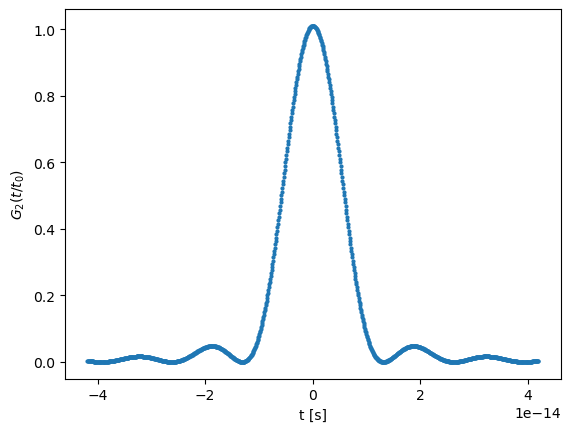

Phase matching plot


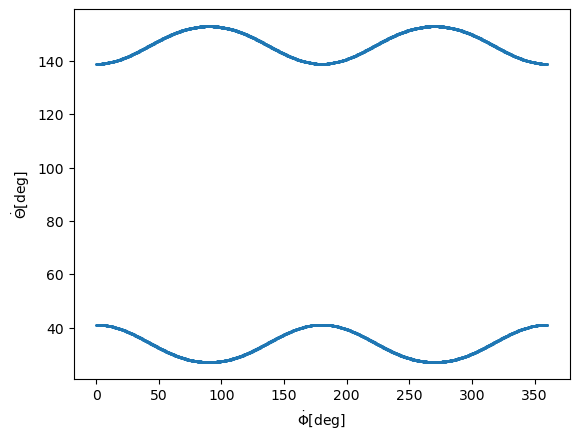

Effective non-linearity plot as a function of phase matching angle theta


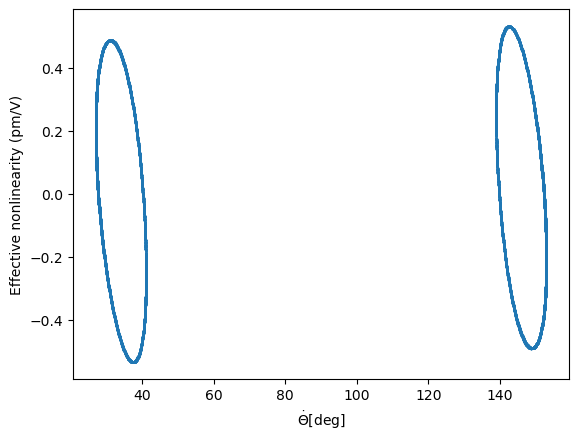

In [3]:
#############################################
print("G2 plot")
##################Plot G2####################
plt.plot(tau,G2,linestyle="",marker="o",markersize=2.0)
plt.xlabel("t [s]")
plt.ylabel("$G_2 (t / t_{0})$")
plt.show()
#plt.savefig('G2.eps')
################Plot Phase matching##########
print("Phase matching plot")
#############################################
plt.plot(phiopt,thetaopt,linestyle="",marker="o",markersize=0.5)
plt.ylabel(r"$\dot{\Theta}$[deg]")
plt.xlabel(r"$\dot{\Phi}$[deg]")
plt.show()
#plt.savefig('Phase_matching.eps')
#############################################
print("Effective non-linearity plot as a function of phase matching angle theta")
#############################################
plt.plot(thetaopt,deff1,linestyle="",marker="o",markersize=0.5)
plt.xlabel(r"$\dot{\Theta}$[deg]")
plt.ylabel("Effective nonlinearity (pm/V)")
plt.show()
#plt.savefig('Theta_deff.eps')
#############################################